In [4]:
import pandas as pd 
import numpy as np
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime as dt


In [44]:
appl_df = pd.read_csv(r'AAPL.csv')
appl_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-23,204.429993,207.750000,203.899994,207.479996,204.799362,23323000
1,2019-04-24,207.360001,208.479996,207.050003,207.160004,204.483505,17540600
2,2019-04-25,206.830002,207.759995,205.119995,205.279999,202.627808,18543200
3,2019-04-26,204.899994,205.000000,202.119995,204.300003,201.660461,18649100
4,2019-04-29,204.399994,205.970001,203.860001,204.610001,201.966461,22204700
5,2019-04-30,203.059998,203.399994,199.110001,200.669998,198.077362,46534900
6,2019-05-01,209.880005,215.309998,209.229996,210.520004,207.800110,64827300
7,2019-05-02,209.839996,212.649994,208.130005,209.149994,206.447800,31996300
8,2019-05-03,210.889999,211.839996,210.229996,211.750000,209.014221,20892400
9,2019-05-06,204.289993,208.839996,203.500000,208.479996,205.786469,32443100


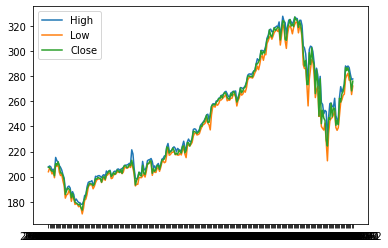

In [4]:
plt.plot(appl_df.Date, appl_df['High'], label = 'High')
plt.plot(appl_df.Date, appl_df['Low'], label = 'Low')
plt.plot(appl_df.Date, appl_df['Close'], label = 'Close')
plt.legend()
plt.show()

In [5]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [6]:
'''
def normalize(df, name):
    df[name] = (df['Open']/df[name]) - 1
'''

"\ndef normalize(df, name):\n    df[name] = (df['Open']/df[name]) - 1\n"

In [7]:
appl_df_columns_need = appl_df
appl_df_columns_need.drop(['Date'], axis = 1, inplace = True)
appl_df_columns_need.head()

,Open,High,Low,Close,Adj Close,Volume
0,204.429993,207.750000,203.899994,207.479996,204.799362,23323000
1,207.360001,208.479996,207.050003,207.160004,204.483505,17540600
2,206.830002,207.759995,205.119995,205.279999,202.627808,18543200
3,204.899994,205.000000,202.119995,204.300003,201.660461,18649100
4,204.399994,205.970001,203.860001,204.610001,201.966461,22204700


In [8]:
from collections.abc import Sequence
from sklearn import preprocessing

def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [9]:
# Normalize Cols
for col in appl_df.columns:
    encode_numeric_zscore(appl_df_columns_need, col)
    appl_df_columns_need[col]

appl_df_columns_need.head()

,Open,High,Low,Close,Adj Close,Volume
0,-0.888715,-0.866985,-0.854151,-0.822428,-0.849776,-0.575934
1,-0.819758,-0.850101,-0.779103,-0.829897,-0.857056,-0.909356
2,-0.832231,-0.866754,-0.825085,-0.873780,-0.899829,-0.851544
3,-0.877654,-0.930590,-0.896559,-0.896655,-0.922125,-0.845438
4,-0.889421,-0.908155,-0.855104,-0.889419,-0.915072,-0.640417


## using Open, High, Low, Adj Close and Volume to predict Close

In [10]:

x, y = to_xy(appl_df_columns_need, 'Close')

In [11]:
x.shape

(253, 5)

In [12]:
y.shape

(253,)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [59]:
print('x train shape: ', x_train.shape)
print('y train shape: ', y_train.shape)
print('------------------------')
print('x test shape: ', x_test.shape)
print('y test shape: ', y_test.shape)
print(x_train.shape[1:])

x train shape:  (189, 5)
y train shape:  (189,)
------------------------
x test shape:  (64, 5)
y test shape:  (64,)
(5,)


In [15]:
# x_train = np.reshape(x_train,(1,x_train.shape[0],x_train.shape[1]))
# x_test = np.reshape(x_test,(1,x_test.shape[0],x_test.shape[1]))

In [61]:
model1 = Sequential()
model1.add(Dense(10, input_shape = x_train.shape[1:], activation='relu'))
model1.add(Dense(1))

In [71]:
model2 = Sequential()
model2.add(Dense(10,input_shape=(5,),activation='relu'))
model2.add(Dense(1))

In [72]:
model2.compile(loss='mean_squared_error',optimizer='adam')

In [73]:
pred = model2.predict(x_test)

In [69]:
#y_true = 

In [74]:
from sklearn import metrics
mse = metrics.mean_squared_error(pred,y_test)

In [75]:
mse

0.70459974

In [76]:
print(np.sqrt(mse))

0.8394044


In [78]:
pred = (pred) * (max(pred) - min(pred)) + min(pred)

In [79]:
pred

array([[ 0.48975492],
       [-1.8894033 ],
       [-0.9889733 ],
       [ 0.4705155 ],
       [-0.7815885 ],
       [-0.08007991],
       [ 0.42739642],
       [ 0.19546628],
       [-0.9455961 ],
       [-1.0698224 ],
       [-0.7154645 ],
       [-0.35687107],
       [-1.4865493 ],
       [-0.7796661 ],
       [-0.5661842 ],
       [-0.9466487 ],
       [-0.05739063],
       [-1.0825379 ],
       [-0.8378505 ],
       [-1.079091  ],
       [-1.3421898 ],
       [-1.1296549 ],
       [-1.0141122 ],
       [-0.42481312],
       [-0.9633942 ],
       [-0.60156435],
       [-0.28376064],
       [ 0.4972812 ],
       [-1.0396384 ],
       [ 0.07609355],
       [-0.25015265],
       [-0.88800967],
       [-0.4411093 ],
       [-0.37859392],
       [-0.45327714],
       [-1.0899687 ],
       [-1.3723328 ],
       [-1.0524391 ],
       [-0.90752774],
       [-0.61440337],
       [-0.10087532],
       [ 0.04437119],
       [-0.68126017],
       [-0.3742004 ],
       [-0.91621745],
       [-0

In [80]:
sp_df = pd.read_csv(r'/Users/robertocampos/Desktop/Main_Folder/^GSPC.csv')
sp_df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-01-16,1146.189941,1146.189941,1127.489990,1127.569946,1127.569946,1482500000
1,2002-01-17,1127.569946,1139.270020,1127.569946,1138.880005,1138.880005,1380100000
2,2002-01-18,1138.880005,1138.880005,1124.449951,1127.579956,1127.579956,1333300000
3,2002-01-22,1127.579956,1135.260010,1117.910034,1119.310059,1119.310059,1311600000
4,2002-01-23,1119.310059,1131.939941,1117.430054,1128.180054,1128.180054,1479200000
5,2002-01-24,1128.180054,1139.500000,1128.180054,1132.150024,1132.150024,1552800000
6,2002-01-25,1132.150024,1138.310059,1127.819946,1133.280029,1133.280029,1345100000
7,2002-01-28,1133.280029,1138.630005,1126.660034,1133.060059,1133.060059,1186800000
8,2002-01-29,1133.060059,1137.469971,1098.739990,1100.640015,1100.640015,1812000000
9,2002-01-30,1100.640015,1113.790039,1081.660034,1113.569946,1113.569946,2019600000


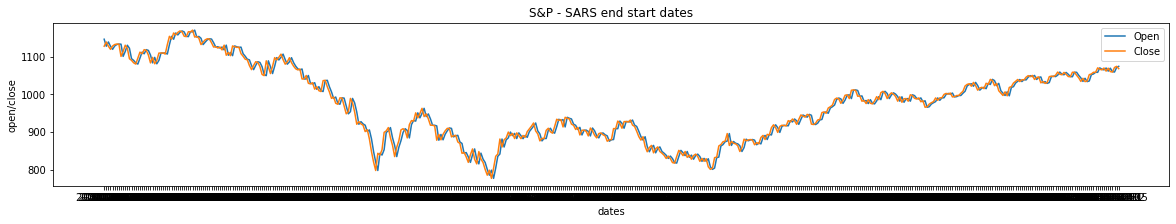

In [104]:

plt.plot(sp_df.Date, sp_df['Open'], label = 'Open')
plt.plot(sp_df.Date, sp_df['Close'], label = 'Close')
#plt.axvline('2002-11-16', c = 'b')
#plt.axvline('2003-03-26' , c = 'k')
#pandermic declaration
#last date
#plt.axvline('2003-01-05' , c='g')
plt.legend()
plt.title('S&P - SARS end start dates')
plt.xlabel('dates')
plt.ylabel('open/close')
plt.show()

In [171]:
ap_sar = pd.read_csv(r'/Users/robertocampos/Desktop/AAPL_sardate.csv')
ap_sar.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/10/02,0.973571,1.015714,0.970000,1.007857,0.874861,80393600
1,10/11/02,1.017857,1.055714,1.007143,1.036429,0.899662,73669400
2,10/14/02,1.039286,1.070000,1.031429,1.055000,0.915783,48601000
3,10/15/02,1.087143,1.089286,1.055714,1.082857,0.939964,101379600
4,10/16/02,1.061429,1.080714,0.992857,1.040000,0.902763,76906200


In [172]:
# Normalize Cols
for col in ap_sar.columns[1:]:
    encode_numeric_zscore(ap_sar, col)
    ap_sar[col]

ap_sar.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/10/02,-1.105252,-0.946333,-1.017609,-0.884806,-0.884806,0.184685
1,10/11/02,-0.812868,-0.688220,-0.766916,-0.697327,-0.697332,0.050849
2,10/14/02,-0.671390,-0.596035,-0.603001,-0.575471,-0.575472,-0.448106
3,10/15/02,-0.355429,-0.471586,-0.439092,-0.392683,-0.392684,0.602385
4,10/16/02,-0.525198,-0.526899,-0.863338,-0.673896,-0.673891,0.115273


In [173]:
ap_sar.size

1421

In [174]:
ap_cov = pd.read_csv(r'/Users/robertocampos/Downloads/AAPL_covid.csv')
ap_cov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/1/19,225.070007,228.220001,224.199997,224.589996,223.387573,34805800
1,10/2/19,223.059998,223.580002,217.929993,218.960007,217.787720,34612300
2,10/3/19,218.429993,220.960007,215.130005,220.820007,219.637756,28606500
3,10/4/19,225.639999,227.490005,223.889999,227.009995,225.794617,34619700
4,10/7/19,226.270004,229.929993,225.839996,227.059998,225.844345,30576500


In [175]:
# Normalize Cols
for col in ap_cov.columns[1:]:
    encode_numeric_zscore(ap_cov, col)
    ap_cov[col]

ap_cov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/1/19,-1.677877,-1.703500,-1.599246,-1.713234,-1.727430,-0.143145
1,10/2/19,-1.746931,-1.862988,-1.813854,-1.905443,-1.917657,-0.152904
2,10/3/19,-1.905996,-1.953043,-1.909691,-1.841942,-1.854811,-0.455812
3,10/4/19,-1.658295,-1.728592,-1.609856,-1.630614,-1.645662,-0.152531
4,10/7/19,-1.636651,-1.644724,-1.543113,-1.628907,-1.643973,-0.356453


In [176]:
ap_cov.size

1008

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#

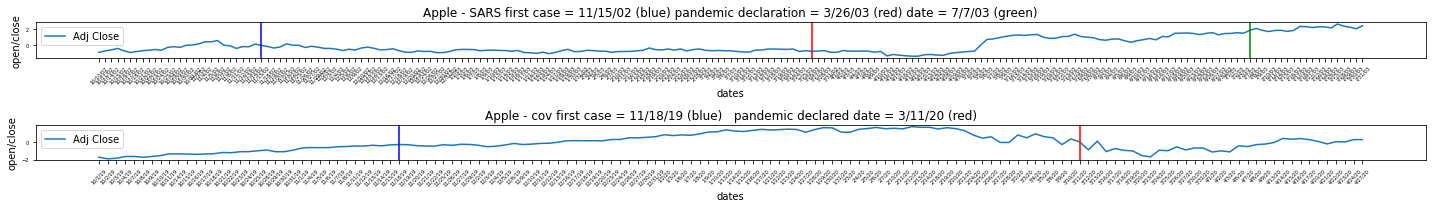

In [184]:
plt.subplot(2,1,1)
plt.plot(ap_sar.Date, ap_sar['Adj Close'], label = 'Adj Close')
plt.axvline('11/15/02', c = 'b') # for some reason the start date is not in there 11/16 Think this is first case
#plt.axvline('2003-03-26' , c = 'k')
#pandermic declaration
plt.axvline('3/26/03', c = 'r') #decl pandemic
#last date
plt.axvline('7/7/03' , c='g') #end
plt.legend()
plt.title('Apple - SARS first case = 11/15/02 (blue) pandemic declaration = 3/26/03 (red) date = 7/7/03 (green)')
plt.xlabel('dates')
plt.ylabel('open/close')
plt.xticks(rotation=45)
plt.tick_params(labelsize=5)

#
plt.subplot(2,1,2)
plt.plot(ap_cov.Date, ap_cov['Adj Close'], label = 'Adj Close')
plt.axvline('11/18/19', c = 'b') #first case
plt.axvline('3/11/20', c = 'r') #declared
plt.legend()
plt.title('Apple - cov first case = 11/18/19 (blue)   pandemic declared date = 3/11/20 (red)')
plt.xlabel('dates')
plt.ylabel('open/close')
plt.xticks(rotation=45)
plt.tick_params(labelsize=5)
plt.tight_layout()
plt.show()


In [210]:
# Normalize Cols
for col in apple_sar.columns[1:]:
    encode_numeric_zscore(apple_sar, col)
    apple_sar[col]

apple_sar.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-10-01,-0.820842,-0.859121,-0.718910,-0.753777,0.339978,-0.753776
1,2002-10-02,-0.808752,-0.817068,-0.826075,-0.892436,-0.251589,-0.892436
2,2002-10-03,-0.820842,-0.833889,-0.887901,-0.839419,-0.311502,-0.839419
3,2002-10-04,-0.901443,-0.863326,-0.813710,-0.949530,-0.453124,-0.949530
4,2002-10-07,-0.978015,-0.960046,-0.974457,-1.055564,-0.171286,-1.055563


In [220]:
p = apple_sar[apple_sar['Date'] == '2003-07-07']
p

,Date,High,Low,Open,Close,Volume,Adj Close
191,2003-07-07,1.427933,1.298156,1.210056,1.432134,0.046216,1.432134


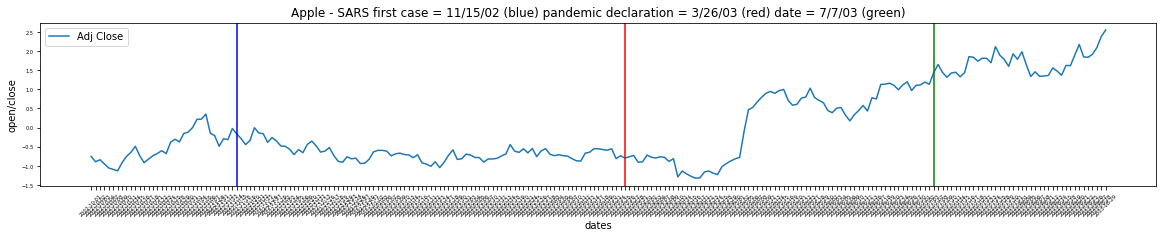

In [221]:
plt.plot(apple_sar.Date, apple_sar['Adj Close'], label = 'Adj Close')
plt.axvline('2002-11-15', c = 'b') # for some reason the start date is not in there 11/16 Think this is first case
#plt.axvline('2003-03-26' , c = 'k')
#pandermic declaration
plt.axvline('2003-03-26', c = 'r') #decl pandemic
#last date
plt.axvline('2003-07-07' , c='g') #end
plt.legend()
plt.title('Apple - SARS first case = 11/15/02 (blue) pandemic declaration = 3/26/03 (red) date = 7/7/03 (green)')
plt.xlabel('dates')
plt.ylabel('open/close')
plt.xticks(rotation=45)
plt.tick_params(labelsize=5)
plt.show()


In [222]:
axp_sar = pd.read_csv(r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_sars/AXP.csv')
axp_sar

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-10-01,28.639816,26.714155,27.396891,28.639816,6172800.0,22.023571
1,2002-10-02,28.648569,27.134300,28.403484,27.309361,5260900.0,21.059298
2,2002-10-03,27.703245,25.996410,27.353125,26.223988,7334000.0,20.222313
3,2002-10-04,26.460320,24.245810,26.223988,24.972309,8410000.0,19.257105
4,2002-10-07,25.129864,23.239216,24.972309,23.282980,9638000.0,17.954391
...,...,...,...,...,...,...,...
226,2003-08-25,39.747372,39.344734,39.668594,39.502289,3354200.0,30.707157
227,2003-08-26,39.511044,38.802048,39.204685,38.994614,4005800.0,30.312527
228,2003-08-27,39.379745,38.767036,39.379745,38.924591,3710700.0,30.258091
229,2003-08-28,39.423512,38.495693,39.012119,39.344734,3805200.0,30.584688


In [223]:
# Normalize Cols
for col in axp_sar.columns[1:]:
    encode_numeric_zscore(axp_sar, col)
    axp_sar[col]

axp_sar.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-10-01,-1.339693,-1.546179,-1.510062,-1.203913,0.349804,-1.228373
1,2002-10-02,-1.337405,-1.439718,-1.251279,-1.547067,-0.160923,-1.543347
2,2002-10-03,-1.584534,-1.728048,-1.521314,-1.827009,1.000156,-1.816743
3,2002-10-04,-1.909462,-2.171632,-1.811601,-2.149845,1.602790,-2.132022
4,2002-10-07,-2.257273,-2.426693,-2.133393,-2.585560,2.290554,-2.557546


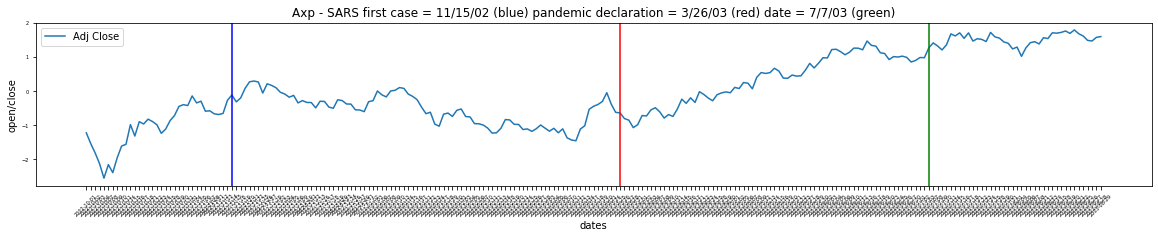

In [224]:
plt.plot(axp_sar.Date, axp_sar['Adj Close'], label = 'Adj Close')
plt.axvline('2002-11-15', c = 'b') # for some reason the start date is not in there 11/16 Think this is first case
#plt.axvline('2003-03-26' , c = 'k')
#pandermic declaration
plt.axvline('2003-03-26', c = 'r') #decl pandemic
#last date
plt.axvline('2003-07-07' , c='g') #end
plt.legend()
plt.title('Axp - SARS first case = 11/15/02 (blue) pandemic declaration = 3/26/03 (red) date = 7/7/03 (green)')
plt.xlabel('dates')
plt.ylabel('open/close')
plt.xticks(rotation=45)
plt.tick_params(labelsize=5)
plt.show()

In [225]:
jnj_sar = pd.read_csv(r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_sars/JNJ.csv')
jnj_sar

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-10-01,56.299999,54.299999,54.950001,56.299999,10937400.0,34.911823
1,2002-10-02,58.900002,57.509998,57.509998,58.299999,14252400.0,36.152042
2,2002-10-03,59.110001,57.250000,58.450001,57.980000,9910400.0,35.953606
3,2002-10-04,58.080002,56.490002,57.980000,56.950001,8789500.0,35.314903
4,2002-10-07,58.230000,56.509998,56.950001,56.700001,7987000.0,35.159874
...,...,...,...,...,...,...,...
226,2003-08-25,49.830002,49.310001,49.709999,49.570000,5767800.0,31.251801
227,2003-08-26,49.919998,49.020000,49.669998,49.669998,7533700.0,31.314846
228,2003-08-27,49.570000,49.200001,49.310001,49.259998,6424000.0,31.056385
229,2003-08-28,49.349998,49.000000,49.259998,49.139999,6193000.0,30.980724


In [226]:
# Normalize Cols
for col in jnj_sar.columns[1:]:
    encode_numeric_zscore(jnj_sar, col)
    jnj_sar[col]

jnj_sar.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-10-01,0.325002,0.048295,0.058360,0.538530,1.163440,0.428711
1,2002-10-02,1.251291,1.234896,0.984353,1.249816,2.444662,1.181422
2,2002-10-03,1.326106,1.138785,1.324367,1.136010,0.766513,1.060987
3,2002-10-04,0.959154,0.857846,1.154360,0.769698,0.333293,0.673347
4,2002-10-07,1.012593,0.865238,0.781793,0.680787,0.023133,0.579257


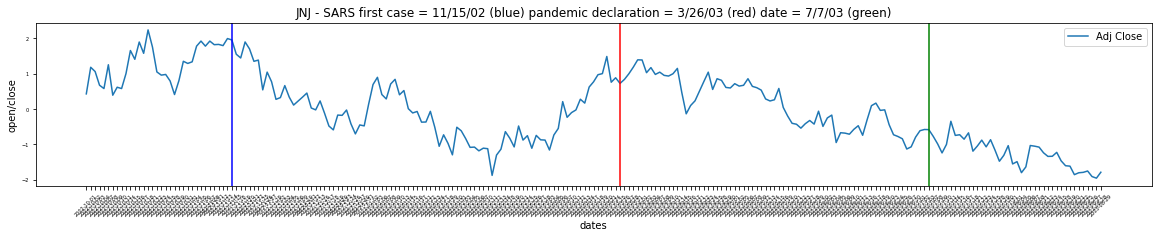

In [227]:
plt.plot(jnj_sar.Date, jnj_sar['Adj Close'], label = 'Adj Close')
plt.axvline('2002-11-15', c = 'b') # for some reason the start date is not in there 11/16 Think this is first case
#plt.axvline('2003-03-26' , c = 'k')
#pandermic declaration
plt.axvline('2003-03-26', c = 'r') #decl pandemic
#last date
plt.axvline('2003-07-07' , c='g') #end
plt.legend()
plt.title('JNJ - SARS first case = 11/15/02 (blue) pandemic declaration = 3/26/03 (red) date = 7/7/03 (green)')
plt.xlabel('dates')
plt.ylabel('open/close')
plt.xticks(rotation=45)
plt.tick_params(labelsize=5)
plt.show()

In [228]:
nke_sar = pd.read_csv(r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_sars/NKE.csv')
nke_sar

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-10-01,5.44750,5.19750,5.39875,5.43500,11379200.0,2.124697
1,2002-10-02,5.55250,5.32500,5.42000,5.38750,11360000.0,2.106128
2,2002-10-03,5.41500,5.23750,5.38375,5.25500,12894400.0,2.054330
3,2002-10-04,5.31625,5.14000,5.27500,5.24250,14320800.0,2.049443
4,2002-10-07,5.24125,4.98500,5.21250,4.99500,17309600.0,1.952688
...,...,...,...,...,...,...,...
226,2003-08-25,6.91625,6.81250,6.86750,6.90625,6108800.0,2.895795
227,2003-08-26,6.94375,6.86125,6.90625,6.92750,5816800.0,2.904705
228,2003-08-27,6.99000,6.87000,6.89625,6.95875,4050400.0,2.917809
229,2003-08-28,7.03125,6.95125,6.98125,7.01500,5835200.0,2.941394


In [229]:
# Normalize Cols
for col in nke_sar.columns[1:]:
    encode_numeric_zscore(nke_sar, col)
    nke_sar[col]

nke_sar.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-10-01,-1.353321,-1.469815,-1.285238,-1.217306,-0.080032,-1.283342
1,2002-10-02,-1.170066,-1.253911,-1.248679,-1.298401,-0.083351,-1.346586
2,2002-10-03,-1.410044,-1.402081,-1.311044,-1.524612,0.181943,-1.523007
3,2002-10-04,-1.582392,-1.567185,-1.498136,-1.545953,0.428564,-1.539652
4,2002-10-07,-1.713289,-1.829657,-1.605661,-1.968499,0.945321,-1.869195


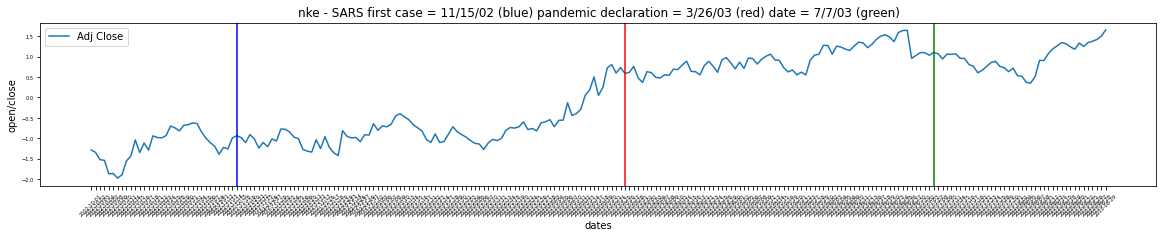

In [231]:
plt.plot(nke_sar.Date, nke_sar['Adj Close'], label = 'Adj Close')
plt.axvline('2002-11-15', c = 'b') # for some reason the start date is not in there 11/16 Think this is first case
#plt.axvline('2003-03-26' , c = 'k')
#pandermic declaration
plt.axvline('2003-03-26', c = 'r') #decl pandemic
#last date
plt.axvline('2003-07-07' , c='g') #end
plt.legend()
plt.title('nke - SARS first case = 11/15/02 (blue) pandemic declaration = 3/26/03 (red) date = 7/7/03 (green)')
plt.xlabel('dates')
plt.ylabel('open/close')
plt.xticks(rotation=45)
plt.tick_params(labelsize=5)
plt.show()

In [235]:
jnj_swine = pd.read_csv(r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_swine/JNJ.csv')
jnj_swine

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-04-15,52.080002,51.349998,51.790001,51.770000,11502500.0,37.128639
1,2009-04-16,52.320000,51.549999,51.910000,52.200001,12216300.0,37.437012
2,2009-04-17,53.369999,52.250000,52.500000,53.049999,17691800.0,38.046627
3,2009-04-20,53.490002,52.340000,53.169998,52.470001,15308900.0,37.630653
4,2009-04-21,52.880001,52.000000,52.549999,52.459999,12236500.0,37.623478
...,...,...,...,...,...,...,...
330,2010-08-05,59.889999,59.509998,59.529999,59.759998,9796700.0,44.673912
331,2010-08-06,60.000000,59.250000,59.520000,59.959999,8524100.0,44.823410
332,2010-08-09,60.250000,59.790001,60.000000,60.049999,6674700.0,44.890694
333,2010-08-10,59.810001,58.900002,59.410000,59.430000,13550800.0,44.427200


In [237]:
# Normalize Cols
for col in jnj_swine.columns[1:]:
    encode_numeric_zscore(jnj_swine, col)
    jnj_swine[col]

jnj_swine.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-04-15,-2.523764,-2.436465,-2.472876,-2.481197,-0.223186,-2.508422
1,2009-04-16,-2.455709,-2.381135,-2.439215,-2.360288,-0.066031,-2.402998
2,2009-04-17,-2.157962,-2.187483,-2.273712,-2.121282,1.139488,-2.194589
3,2009-04-20,-2.123933,-2.162584,-2.085769,-2.284368,0.614854,-2.336798
4,2009-04-21,-2.296910,-2.256644,-2.259687,-2.287181,-0.061584,-2.339251


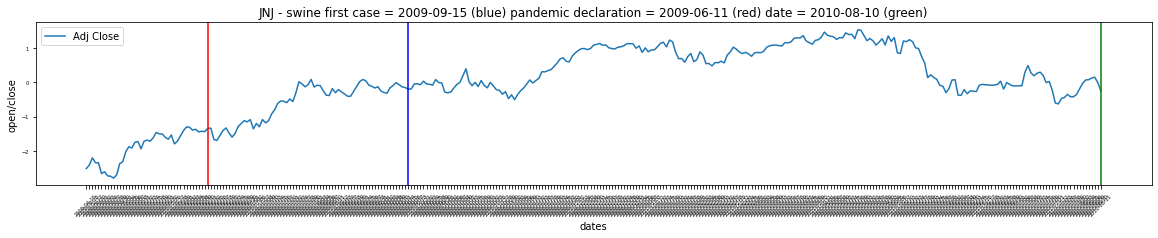

In [241]:
plt.plot(jnj_swine.Date, jnj_swine['Adj Close'], label = 'Adj Close')
plt.axvline('2009-09-15', c = 'b') # for some reason the start date is not in there 11/16 Think this is first case
#plt.axvline('2003-03-26' , c = 'k')
#pandermic declaration
plt.axvline('2009-06-11', c = 'r') #decl pandemic
#last date
plt.axvline('2010-08-11' , c='g') #end
plt.legend()
plt.title('JNJ - swine first case = 2009-09-15 (blue) pandemic declaration = 2009-06-11 (red) date = 2010-08-10 (green)')
plt.xlabel('dates')
plt.ylabel('open/close')
plt.xticks(rotation=45)
plt.tick_params(labelsize=5)
plt.show()

In [269]:
nke_swine = pd.read_csv(r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_swine/NKE.csv')
nke_swine

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-04-15,13.050000,12.762500,12.850000,13.027500,11099600.0,9.148989
1,2009-04-16,13.522500,12.982500,13.050000,13.442500,11566000.0,9.440438
2,2009-04-17,13.750000,13.305000,13.507500,13.652500,13864000.0,9.587915
3,2009-04-20,13.470000,13.005000,13.470000,13.090000,9961200.0,9.192880
4,2009-04-21,13.412500,13.007500,13.077500,13.317500,10292400.0,9.352653
...,...,...,...,...,...,...,...
330,2010-08-05,18.590000,18.325001,18.362499,18.514999,8065600.0,14.141367
331,2010-08-06,18.522499,18.195000,18.355000,18.490000,7698800.0,14.122274
332,2010-08-09,18.750000,18.469999,18.535000,18.530001,7893600.0,14.152828
333,2010-08-10,18.597500,18.200001,18.355000,18.477501,9386400.0,14.112728


In [258]:
# Normalize Cols
for col in nke_swine.columns[1:]:
    encode_numeric_zscore(nke_swine, col)
    nke_swine[col]

nke_swine.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-04-15,-1.567121,-1.529693,-1.569753,-1.495428,-0.291301,-1.514984
1,2009-04-16,-1.325438,-1.417365,-1.467763,-1.283128,-0.222172,-1.345662
2,2009-04-17,-1.209073,-1.252702,-1.234461,-1.175699,0.118434,-1.259982
3,2009-04-20,-1.352292,-1.405877,-1.253584,-1.463455,-0.460033,-1.489485
4,2009-04-21,-1.381703,-1.404600,-1.453739,-1.347074,-0.410943,-1.396662


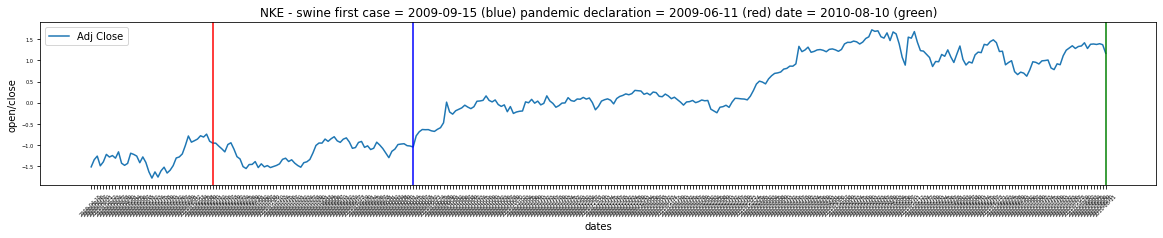

In [259]:
plt.plot(nke_swine.Date, nke_swine['Adj Close'], label = 'Adj Close')
plt.axvline('2009-04-15', c = 'b') # for some reason the start date is not in there 11/16 Think this is first case
#plt.axvline('2003-03-26' , c = 'k')
#pandermic declaration
plt.axvline('2009-06-11', c = 'r') #decl pandemic
#last date
plt.axvline('2010-08-11' , c='g') #end
plt.legend()
plt.title('NKE - swine first case = 2009-09-15 (blue) pandemic declaration = 2009-06-11 (red) date = 2010-08-10 (green)')
plt.xlabel('dates')
plt.ylabel('open/close')
plt.xticks(rotation=45)
plt.tick_params(labelsize=5)
plt.show()

In [382]:
#plt any
def plot_any(path, first_case, declared, end, title):
    df = pd.read_csv(path)
    # Normalize Cols
    for col in df.columns[1:]:
        encode_numeric_zscore(df, col)
        df[col]
    plt.plot(df.Date, df['Adj Close'], label = 'ADJ CLOSE TREND')
    plt.axvline(first_case, c = 'b', label = ('First Case', first_case)) # first case                             
    plt.axvline(declared, c = 'r', label = ('Pandemic Declaration', declared)) #pandermic declaration
    plt.axvline(end , c='g', label = ('Current Date', end)) #end / last date
    plt.legend()
    plt.title(title)
    plt.xlabel('DURATION')
    plt.ylabel('ADJ CLOSE TREND')
    plt.xticks([])
    #plt.tick_params(labelsize=5)
    plt.show()


In [18]:
#plt any
def plot_any2(path, first_case, declared, end, title):
    df = pd.read_csv(path,parse_dates=True)
    # Normalize Cols
    # for col in df.columns[1:]:
    #     encode_numeric_zscore(df, col)
    #     df[col]
    plt.plot(df.Date, df['Adj Close'], label = 'ADJ CLOSE TREND')
    plt.axvline(first_case, c = 'b', label = ('First Case', first_case)) # first case                             
    plt.axvline(declared, c = 'r', label = ('Pandemic Declaration', declared)) #pandermic declaration
    plt.axvline(end , c='g', label = ('Current Date', end)) #end / last date


    # df['Adj Close'].rolling(7).mean().plot()
    plt.plot(df['Adj Close'].rolling(7).mean(),label='moving avg 7')

    # df['Adj Close'].rolling(30).mean().plot()
    plt.plot(df['Adj Close'].rolling(30).mean(),label='moving avg 30')
    plt.legend()
    plt.title(title)
    plt.xlabel('DURATION')
    plt.ylabel('ADJ CLOSE TREND')
    plt.xticks([])
    #plt.tick_params(labelsize=5)

    plt.show()

In [2]:
ls

COVID 19 ML Model Data/  get_stock_data.py        sp500tickers.pickle
DONTDELETE.py            moving_average.ipynb     stock_dfs/
covid.ipynb              moving_average.py        stock_dfs_corona/
covid_stock.ipynb        old data/                stock_dfs_ebola/
covid_stock.py           prediction.py            stock_dfs_sars/
eda/                     sp500.csv                stock_dfs_swine/
eda2.ipynb               sp500_joined_closes.csv


In [383]:
APPLE = r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_corona/AAPL.csv'
ALASKA_AIR = r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_corona/ALK.csv'
AMERICAN_EXP = r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_corona/AXP.csv'
CHEVRON = r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_corona/CVX.csv'
FORD = r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_corona/F.csv'
JOHNSON_JOHNSON = r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_corona/JNJ.csv'
NIKE = r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_corona/NKE.csv'

path = [APPLE, ALASKA_AIR, AMERICAN_EXP, CHEVRON, FORD, JOHNSON_JOHNSON, NIKE]
names = ['APPLE', 'ALASKA_AIR', 'AMERICAN_EXP', 'CHEVRON', 'FORD', 'JOHNSON_JOHNSON', 'NIKE']

In [5]:
APPLE = r'stock_dfs_corona/AAPL.csv'
ALASKA_AIR = r'stock_dfs_corona/ALK.csv'
AMERICAN_EXP = r'stock_dfs_corona/AXP.csv'
CHEVRON = r'stock_dfs_corona/CVX.csv'
FORD = r'stock_dfs_corona/F.csv'
JOHNSON_JOHNSON = r'stock_dfs_corona/JNJ.csv'
NIKE = r'stock_dfs_corona/NKE.csv'

path = [APPLE, ALASKA_AIR, AMERICAN_EXP, CHEVRON, FORD, JOHNSON_JOHNSON, NIKE]
names = ['APPLE', 'ALASKA_AIR', 'AMERICAN_EXP', 'CHEVRON', 'FORD', 'JOHNSON_JOHNSON', 'NIKE']

In [12]:
pwd

'/Users/austinwilson/Desktop/CSUS/177/final project/final solution'

In [15]:
path = '/Users/austinwilson/desktop/SOXL.csv'
names = 'SOXL.csv'


In [16]:
test = pd.read_csv(path)

In [376]:
ap_e = pd.read_csv(APPLE)
ap_e.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-11-18,267.429993,264.230011,265.799988,267.100006,21675800.0,266.467590
1,2019-11-19,268.000000,265.390015,267.899994,266.290009,19041800.0,265.659515
2,2019-11-20,266.079987,260.399994,265.540009,263.190002,26558600.0,262.566864
3,2019-11-21,264.010010,261.179993,263.690002,262.010010,30348800.0,261.389648
4,2019-11-22,263.179993,260.839996,262.589996,261.779999,16331300.0,261.160187


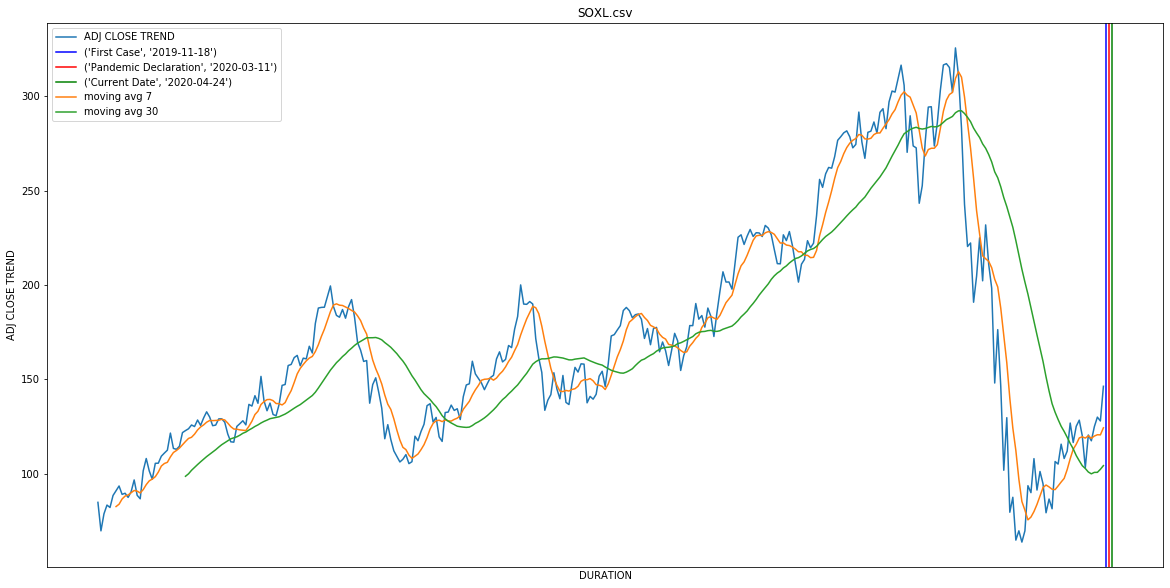

In [19]:
plt.figure(figsize=(20,10))
plot_any2(path, '2019-11-18', '2020-03-11', '2020-04-24', names)  

In [6]:
test = 1
for i in range(test): #range(len(path)):
    plt.figure(figsize=(20,10))
    plot_any2(path[i], '2019-11-18', '2020-03-11', '2020-04-24', names[i])    
    
# pdf_pages.close()

FileNotFoundError: [Errno 2] File b'U' does not exist: b'U'

In [381]:
#p = ap_e[ap_e['Date'] == '2020-03-11']
#p
ap_e.Date.max()

'2020-04-24'

In [6]:
for i in range(len(path)):
    plot_any(path[i], '2019-11-18', '2020-03-11', '2020-04-24', names[i])    
pdf_pages.close()


NameError: name 'plot_any' is not defined

In [419]:
def plot_any2(path, first_case, declared, end, title, i):
    #fig = plt.figure(figsize=(20, 11), dpi=100)
    df = pd.read_csv(path)
    # Normalize Cols
    for col in df.columns[1:]:
        encode_numeric_zscore(df, col)
        df[col]
    plt.subplot(2,2,i)
    plt.plot(df.Date, df['Adj Close'], label = 'ADJ CLOSE TREND')
    plt.axvline(first_case, c = 'b', label = ('First Case', first_case)) # first case                             
    plt.axvline(declared, c = 'r', label = ('Pandemic Declaration', declared)) #pandermic declaration
    plt.axvline(end , c='g', label = ('Current Date', end)) #end / last date / recent
    plt.legend()
    plt.title(title)
    plt.xlabel('DURATION')
    plt.ylabel('ADJ CLOSE TREND')
    plt.xticks([])
    #plt.tick_params(labelsize=5)
    #pdf_pages.savefig(fig)
    plt.show()



In [417]:
path2 = [ALASKA_AIR, CHEVRON, JOHNSON_JOHNSON, NIKE]
names2 = ['ALASKA_AIR', 'CHEVRON', 'JOHNSON_JOHNSON', 'NIKE']

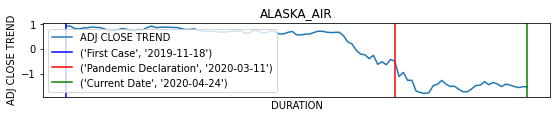

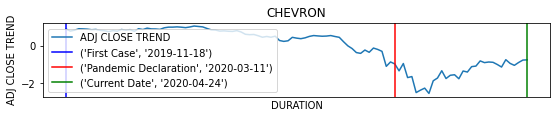

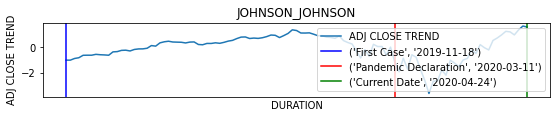

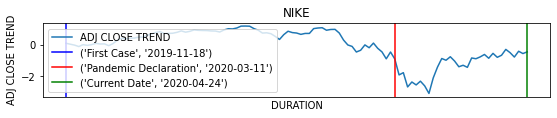

In [420]:
for i in range(len(path2)):
    #plt.subplot(2,2,i+1)
    plot_any2(path2[i], '2019-11-18', '2020-03-11', '2020-04-24', names2[i], i+1)  
plt.close()


In [209]:
apple_sar = pd.read_csv(r'/Users/robertocampos/Desktop/177_project/177/stock_dfs_sars/AAPL.csv')
apple_sar

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-10-01,1.042857,1.000000,1.042143,1.036429,85605800,0.899662
1,2002-10-02,1.045000,1.007143,1.023571,1.012143,57337000,0.878581
2,2002-10-03,1.042857,1.004286,1.012857,1.021429,54474000,0.886642
3,2002-10-04,1.028571,0.999286,1.025714,1.002143,47706400,0.869901
4,2002-10-07,1.015000,0.982857,0.997857,0.983571,61174400,0.853780
...,...,...,...,...,...,...,...
226,2003-08-25,1.493571,1.463571,1.484286,1.490000,34445600,1.293381
227,2003-08-26,1.505000,1.453571,1.482143,1.503571,41239800,1.305162
228,2003-08-27,1.534286,1.475714,1.493571,1.534286,56425600,1.331823
229,2003-08-28,1.587143,1.523571,1.523571,1.585000,79906400,1.375844
